In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs,make_moons
from sklearn import datasets 

In [3]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")
            
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
        
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y)
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
                    
            m = X.shape[1]  
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)
                    
            if display_loss:
                plt.plot(np.array(list(loss.values())).astype(float))
                plt.xlabel('Epochs')
            if loss_fn == "mse":
                 plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
                plt.grid()
                plt.show()
                
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [4]:
class FFNetwork:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.w7 = np.random.randn()
        self.w8 = np.random.randn()
        self.w9 = np.random.randn()
        self.w10 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.x1, self.x2 ,self.x3, self.x4= x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.w3*self.x3 + self.w4*self.x4 +self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w5*self.x1 + self.w6*self.x2 + self.w7*self.x1 + self.w8*self.x2 +self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w9*self.h1 + self.w10*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    def grad(self, x, y):
        self.forward_pass(x)
        
        self.dw9 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw10 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w9 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w9 * self.h1*(1-self.h1) * self.x2
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w9 * self.h1*(1-self.h1) * self.x3
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w9 * self.h1*(1-self.h1) * self.x3
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w9 * self.h1*(1-self.h1)
  
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.w10 * self.h2*(1-self.h2) * self.x1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.w10 * self.h2*(1-self.h2) * self.x2
        self.dw7 = (self.h3-y) * self.h3*(1-self.h3) * self.w10 * self.h1*(1-self.h1) * self.x3
        self.dw8 = (self.h3-y) * self.h3*(1-self.h3) * self.w10 * self.h1*(1-self.h1) * self.x4
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w10 * self.h2*(1-self.h2)
        
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.w7 = np.random.randn()
            self.w8 = np.random.randn()
            self.w9 = np.random.randn()
            self.w10 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
      
        if display_loss:
            loss = {}
            
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6,dw7,dw8,dw9,dw10, db1, db2, db3 = [0]*13
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.w7 -= learning_rate * dw7 / m
            self.w8 -= learning_rate * dw8 / m
            self.w9 -= learning_rate * dw9 / m
            self.w10 -= learning_rate * dw10 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
            
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
                
        
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [61]:
iris=datasets.load_iris()
a=pd.DataFrame(iris.data,columns=iris.feature_names)
a['target']=iris.target
df=a[:100]
x=df.drop('target',axis=1)
y=df['target']
X_train, X_val, Y_train, Y_val = train_test_split(x,y, stratify=y, random_state=42,test_size=.3)
X_train.shape, X_val.shape

((70, 4), (30, 4))

<ipython-input-3-90c7ef78b848>:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


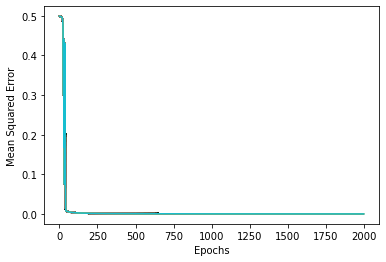

In [67]:
sn = SigmoidNeuron()
sn.fit(X_train.values, Y_train.values, epochs=2000, learning_rate=0.1, display_loss=True)

In [68]:
Y_pred_train = sn.predict(X_train.values)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val.values)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy : ",round(accuracy_train,2) )
print("Validation accuracy : ",round(accuracy_val,2))

Training accuracy :  1.0
Validation accuracy :  1.0


<ipython-input-4-c733dd1686c3>:68: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


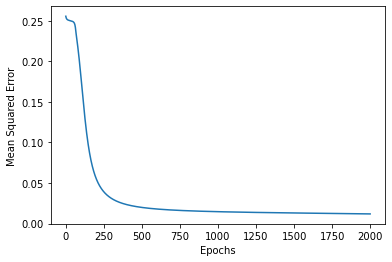

In [69]:
ffn = FFNetwork()
ffn.fit(X_train.values, Y_train.values, epochs=2000, learning_rate=.1, display_loss=True)

In [70]:
Y_pred_train = ffn.predict(X_train.values)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val.values)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

In [71]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)
print("Training accuracy", round(accuracy_train, 3))
print("Validation accuracy", round(accuracy_val, 3))

Training accuracy 0.986
Validation accuracy 1.0


In [31]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=4, random_state=0)
(data.shape, labels.shape)
labels_orig = labels
labels = np.mod(labels_orig, 2)

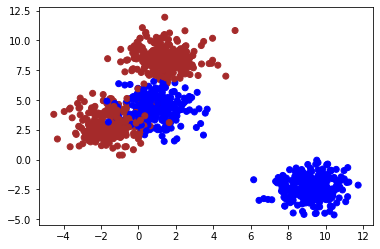

In [32]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue", "yellow", "brown"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0,test_size=.3)
X_train.shape, X_val.shape

((700, 4), (300, 4))

# feed forward neural network

<ipython-input-4-c733dd1686c3>:68: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


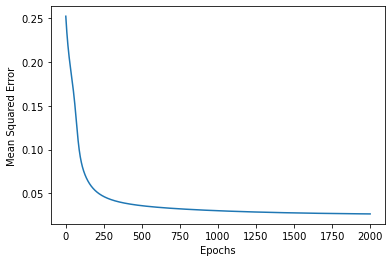

In [42]:
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [43]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

In [44]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)
print("Training accuracy", round(accuracy_train, 3))
print("Validation accuracy", round(accuracy_val, 3))

Training accuracy 0.969
Validation accuracy 0.967


# sigmoid neuron

<ipython-input-3-90c7ef78b848>:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


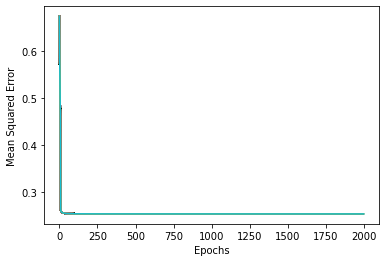

In [45]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [48]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

In [49]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)
print("Training accuracy", round(accuracy_train, 3))
print("Validation accuracy", round(accuracy_val, 3))

Training accuracy 0.747
Validation accuracy 0.757
